In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from nilearn import datasets

atlas= datasets.fetch_atlas_schaefer_2018(n_rois=1000, yeo_networks=17, resolution_mm=1, data_dir=None, base_url=None, resume=True, verbose=1)
print(f"The atlas contains {len(atlas.labels) - 1} non-overlapping regions")

The atlas contains 999 non-overlapping regions


In [3]:
labels = np.insert(atlas.labels, 0, 'Background')

# Step 4: Convert all labels to strings
labels = [str(label) for label in labels]

In [4]:
df1 = pd.read_csv("csv.csv")
signals1 = df1.values
df1.head()
print(signals1)


[[ 7.97909300e+00  4.31699470e+00  7.27486100e+00 ...  1.14004965e+01
   1.16169815e+01  1.18442370e+01]
 [ 1.17233590e+00  2.11127970e-01  4.50031880e-01 ...  2.21718180e-01
  -6.00438840e-03 -2.76149800e-02]
 [ 7.97013400e-01  5.78889600e-01  7.06792700e-01 ... -2.18798780e-03
  -7.90928400e-02  8.80495000e-03]
 ...
 [-5.31990600e-01  6.66625400e-01  4.68139700e-01 ...  6.93464500e-02
  -4.18968650e-02  3.37468420e-01]
 [ 8.34775100e-01 -5.03079030e-02  2.01942490e-01 ...  1.02695370e-01
   1.22583225e-01 -1.83219770e-03]
 [ 5.12912500e-01  2.35631590e-01  4.87954200e-01 ...  2.96875400e-01
   5.30002000e-01  3.13653830e-01]]


In [5]:
df2 = pd.read_csv("processed_subjects/final_processed/29913.csv")
signals2 = df2.values
df2.head()
print(signals2)

[[ 7.0680385e+00  5.1869950e+00  7.6144000e+00 ...  1.1536378e+01
   1.1526134e+01  1.1533713e+01]
 [ 1.1327139e+00  1.7092838e+00  2.0346622e+00 ...  1.9613444e+00
   2.8247862e+00  2.9731190e+00]
 [-1.4958950e+00 -2.0769656e-01 -4.2414454e-01 ... -2.2946621e-01
  -5.2844334e-01 -5.9016260e-01]
 ...
 [ 8.6105174e-01  9.2976147e-01  3.3083636e-01 ...  1.4021063e-01
  -3.6006057e-01 -4.9568470e-02]
 [ 1.0299560e+00 -2.4473699e-02  3.9238393e-01 ...  2.3891191e-01
   1.6643235e-03  8.9632520e-02]
 [ 1.4731703e+00  1.5689316e+00  8.8559765e-01 ...  2.0679705e-01
   7.0498540e-02  2.8315060e-01]]


In [123]:
import numpy as np
from scipy.stats import pearsonr
from scipy.spatial.distance import euclidean
from scipy.signal import correlate

# Parameters for identifying dissimilar signals
correlation_threshold = 0.1  # Correlation threshold
mad_threshold = 0.9          # Mean Absolute Difference threshold
dtw_threshold = 18          # DTW distance threshold
euclidean_threshold = 18      # Euclidean distance threshold
energy_difference_threshold = 0  # Signal energy difference threshold

significant_signals = []
indexes = []

# Compare signals using multiple filters
for i, column in enumerate(df1.columns):
    signal1 = df1[column].values
    signal2 = df2[column].values
    
    # Compute Pearson correlation
    corr, _ = pearsonr(signal1, signal2)
    
    # Compute Mean Absolute Difference (MAD)
    mad = np.mean(np.abs(signal1 - signal2))
    
    # Compute Dynamic Time Warping (DTW)
    dtw_distance = euclidean(signal1, signal2)  # Use Euclidean distance as a proxy for simplicity
    
    # Compute Euclidean Distance
    euclid_dist = np.linalg.norm(signal1 - signal2)
    
    # Compute Energy Difference
    energy_diff = np.abs(np.sum(signal1**2) - np.sum(signal2**2))
    
    # Identify dissimilar signals based on criteria
    if (
        corr < correlation_threshold and
        mad > mad_threshold and
        dtw_distance > dtw_threshold and
        euclid_dist > euclidean_threshold and
        energy_diff > energy_difference_threshold
    ):
        significant_signals.append(column)
        indexes.append(i)
        


/tmp/ipykernel_3393/4212712099.py:22: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(signal1, signal2)


In [124]:
print(len(indexes))
print(indexes)

31
[81, 91, 173, 174, 175, 179, 193, 256, 366, 369, 457, 572, 586, 617, 619, 620, 623, 641, 642, 651, 684, 694, 739, 772, 831, 877, 878, 880, 904, 905, 958]


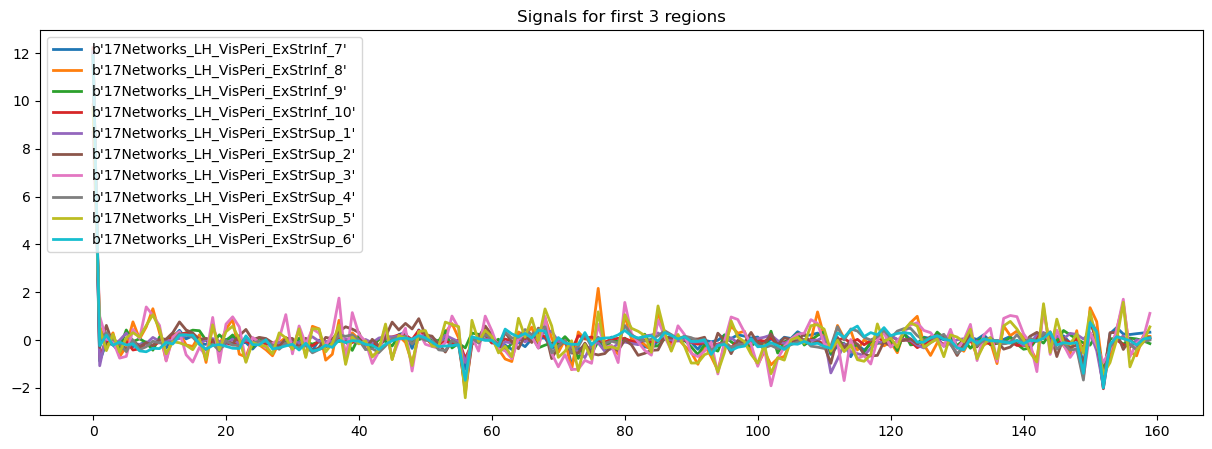

In [125]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
for label_idx in range(50,60):
    ax.plot(
        signals1[:, label_idx], linewidth=2, label=labels[label_idx + 1]
    )  # 0 is background
ax.legend(loc=2)
ax.set_title("Signals for first 3 regions")
plt.show()

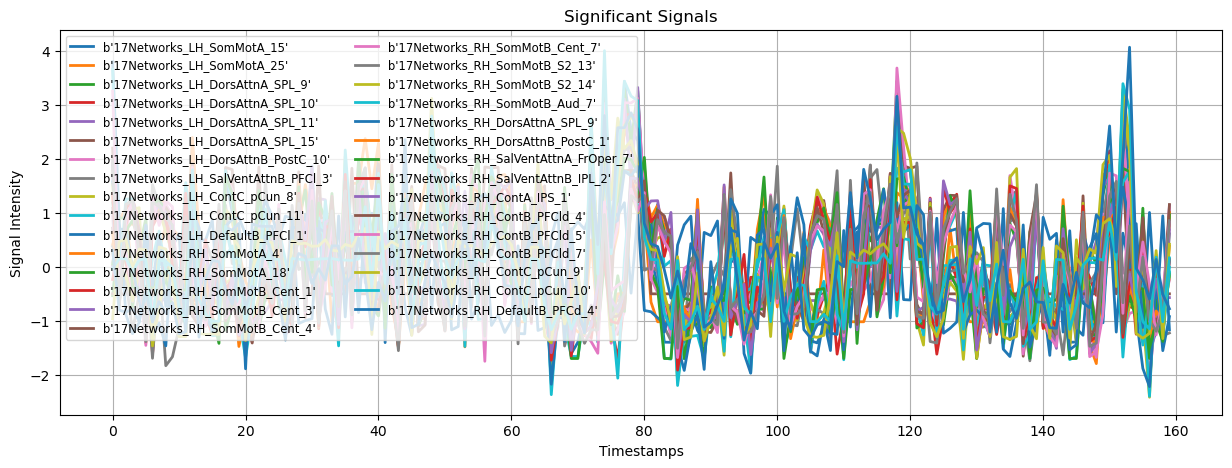

In [126]:

# Plot significant signals for the regions indexed in 'indexes'
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)

# Ensure 'indexes' is a list of column indices
for label_idx in indexes:
    ax.plot(
        df1.iloc[:, label_idx], linewidth=2, label=labels[label_idx]
    )  # Access signal using .iloc for DataFrame

# Add legend and title
ax.legend(loc="upper left", fontsize="small", ncol=2)  # Adjust columns for the legend if necessary
ax.set_title("Significant Signals")
ax.set_xlabel("Timestamps")
ax.set_ylabel("Signal Intensity")

# Show the plot
plt.grid(True)
plt.show()



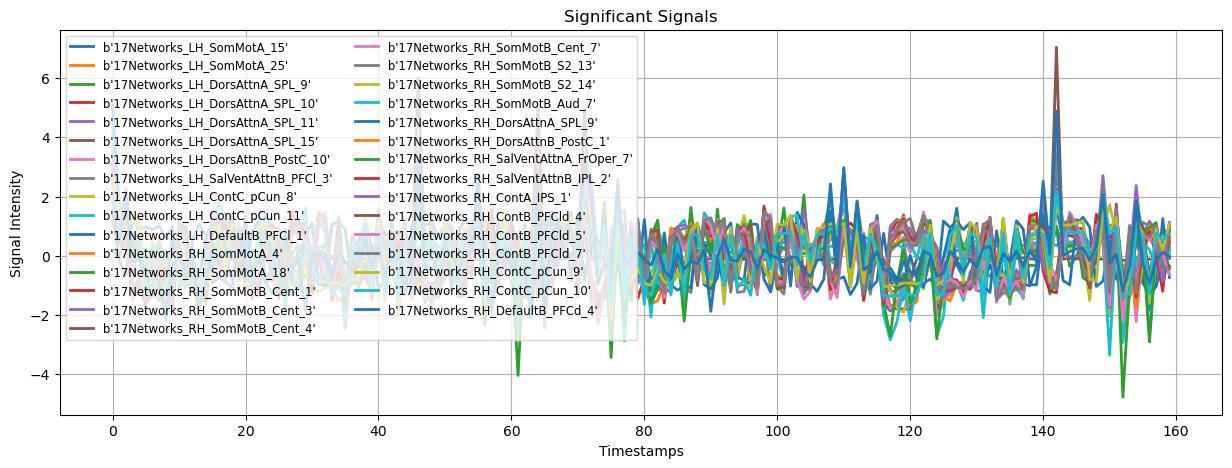

In [127]:
# Plot significant signals for the regions indexed in 'indexes'
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)

# Ensure 'indexes' is a list of column indices
for label_idx in indexes:
    ax.plot(
        df2.iloc[:, label_idx], linewidth=2, label=labels[label_idx]
    )  # Access signal using .iloc for DataFrame

# Add legend and title
ax.legend(loc="upper left", fontsize="small", ncol=2)  # Adjust columns for the legend if necessary
ax.set_title("Significant Signals")
ax.set_xlabel("Timestamps")
ax.set_ylabel("Signal Intensity")

# Show the plot
plt.grid(True)
plt.show()

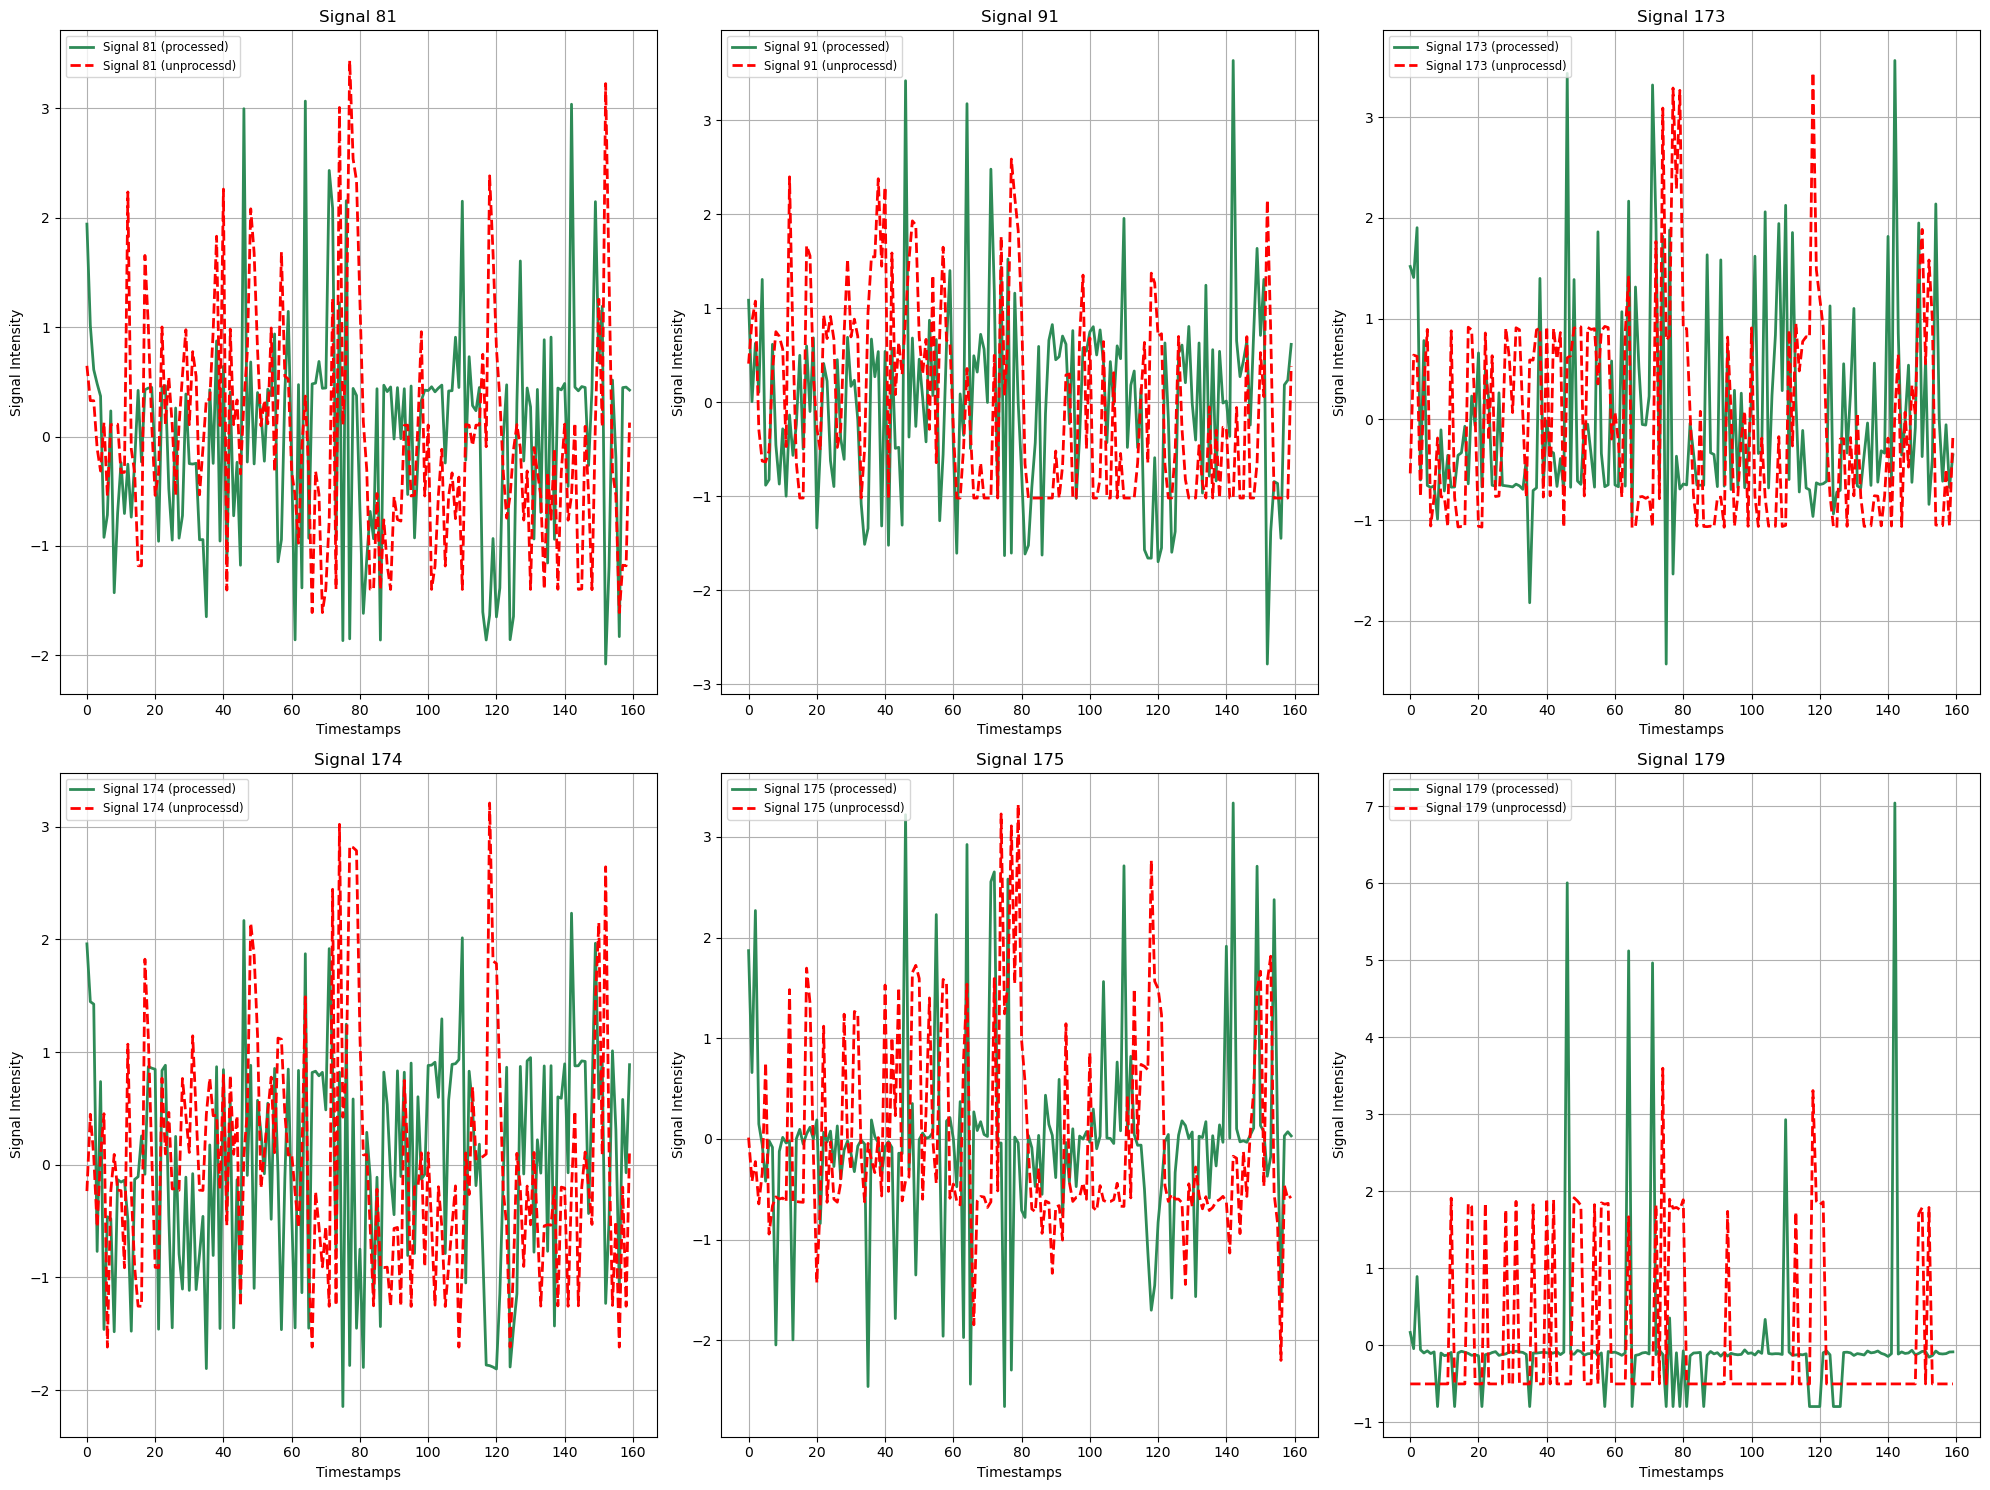

In [145]:
import matplotlib.pyplot as plt

# Number of subplots (6 in this case)
num_subplots = 6
rows = 2
cols = 3  # You can adjust this depending on how you want to arrange the subplots

# Create the figure and axes for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

# Plot each significant signal in its own subplot
for i, label_idx in enumerate(indexes[:num_subplots]):  # Limit to 6 signals
    ax = axes[i]  # Select the i-th subplot axis
    
    # Plot df2 (current dataset) signal
    ax.plot(
        df2.iloc[:, label_idx], linewidth=2, label=f"Signal {label_idx} (processed)", color='seagreen'
    )
    
    # Plot df1 (previous dataset) signal on the same subplot
    ax.plot(
        df1.iloc[:, label_idx], linewidth=2, label=f"Signal {label_idx} (unprocessd)", color='red', linestyle='--'
    )
    
    # Add title and labels to each subplot
    ax.set_title(f"Signal {label_idx}")
    ax.set_xlabel("Timestamps")
    ax.set_ylabel("Signal Intensity")
    ax.grid(True)

    # Add a legend
    ax.legend(loc="upper left", fontsize="small")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



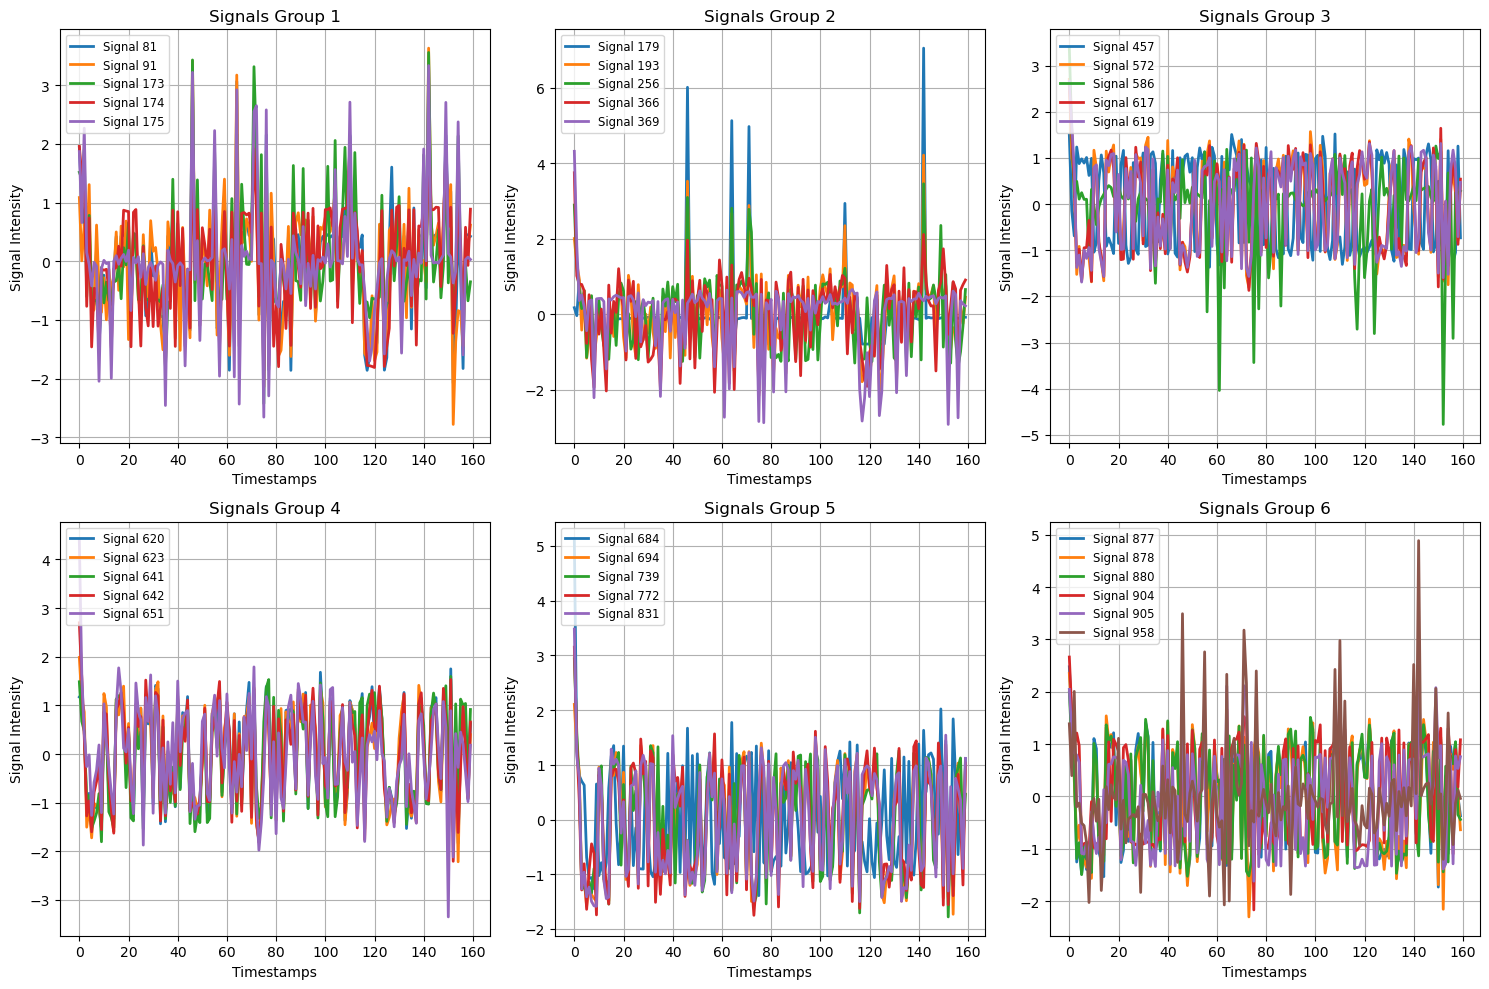

In [137]:
import matplotlib.pyplot as plt

# Number of subplots (6 in this case)
num_subplots = 6
signals_per_subplot = len(indexes) // num_subplots  # Determine how many signals per subplot

# Create the figure and axes for the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten to make it easier to iterate over

# Plot each group of signals in a separate subplot
for i in range(num_subplots):
    ax = axes[i]  # Select the i-th subplot axis
    start_idx = i * signals_per_subplot
    end_idx = (i + 1) * signals_per_subplot if i != num_subplots - 1 else len(indexes)  # Handle the last subplot
    
    # Plot the signals in the current group
    for label_idx in indexes[start_idx:end_idx]:
        ax.plot(
            df2.iloc[:, label_idx], linewidth=2, label=f"Signal {label_idx}"
        )  # Access signal using .iloc for DataFrame
    
    # Add title and labels to each subplot
    ax.set_title(f"Signals Group {i + 1}")
    ax.set_xlabel("Timestamps")
    ax.set_ylabel("Signal Intensity")
    ax.grid(True)

    # Add legend if necessary
    ax.legend(loc="upper left", fontsize="small")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


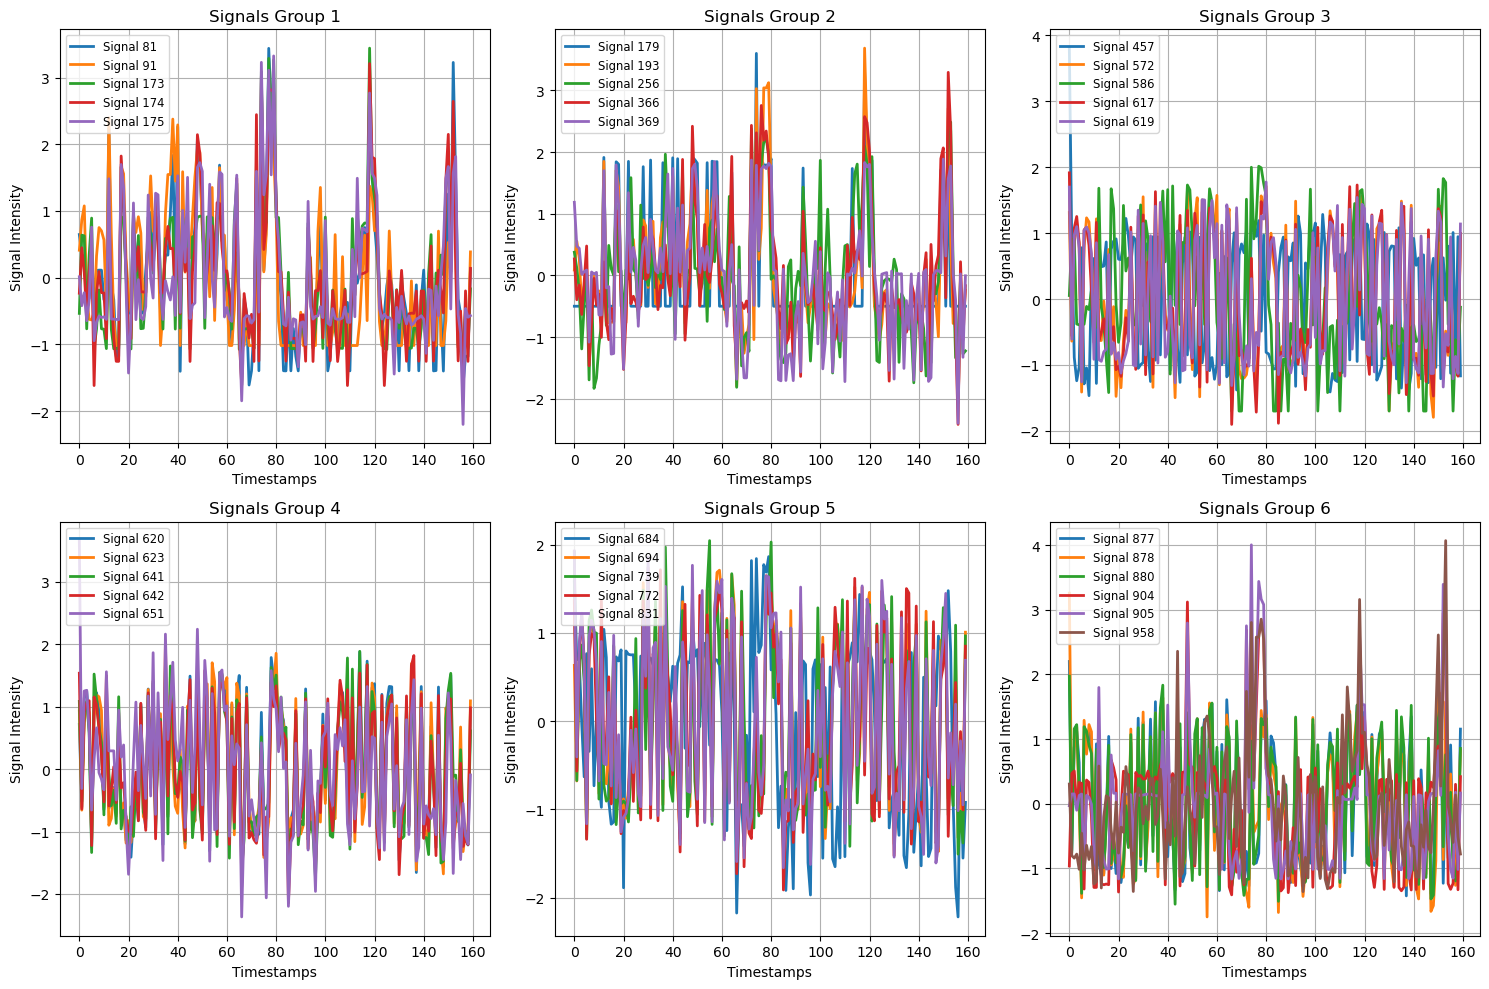

In [130]:
import matplotlib.pyplot as plt

# Number of subplots (6 in this case)
num_subplots = 6
signals_per_subplot = len(indexes) // num_subplots  # Determine how many signals per subplot

# Create the figure and axes for the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten to make it easier to iterate over

# Plot each group of signals in a separate subplot
for i in range(num_subplots):
    ax = axes[i]  # Select the i-th subplot axis
    start_idx = i * signals_per_subplot
    end_idx = (i + 1) * signals_per_subplot if i != num_subplots - 1 else len(indexes)  # Handle the last subplot
    
    # Plot the signals in the current group
    for label_idx in indexes[start_idx:end_idx]:
        ax.plot(
            df1.iloc[:, label_idx], linewidth=2, label=f"Signal {label_idx}"
        )  # Access signal using .iloc for DataFrame
    
    # Add title and labels to each subplot
    ax.set_title(f"Signals Group {i + 1}")
    ax.set_xlabel("Timestamps")
    ax.set_ylabel("Signal Intensity")
    ax.grid(True)

    # Add legend if necessary
    ax.legend(loc="upper left", fontsize="small")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()
